In [ ]:
import pandas as pd
df = pd.read_excel("datasheet.xlsx")
df.to_csv("data/raw_real_estate_data.csv", index=False)
#Converted the excel sheet data to CSV file 

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

df = pd.read_csv("../data/raw_real_estate_data.csv", header=4)# Loading with proper header 


df = df.loc[:, ~df.columns.str.contains('^Unnamed')]# Dropping unnamed/empty columns

print(df.shape)
print(df.columns)
print(df.head())

df.to_csv("../data/processed_real_estate_data.csv", index=False)

In [ ]:
df.isnull().sum().sort_values(ascending=False) #Checking for null values 

df[' Layout'] = df[' Layout'].fillna('Not specified')# Filling categorical with 'Not specified'

df[' Number of rooms'] = df[' Number of rooms'].fillna('Unknown')# Filling categorical with 'Unknown'

df[' Additional description'] = df[' Additional description'].fillna('')# Filling text column with empty string

df = df.dropna(subset=[' Price, RUR'])# Dropping the row with missing target value

df.isnull().sum()

df.to_csv("../data/processed_real_estate_data.csv", index=False)


<class 'pandas.core.frame.DataFrame'>
Index: 615 entries, 0 to 615
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0    Date                    615 non-null    object
 1    Address                 615 non-null    object
 2    Number of rooms         615 non-null    object
 3    Price, RUR              615 non-null    object
 4    Layout                  615 non-null    object
 5    Floor                   615 non-null    object
 6    Total area, m2          615 non-null    object
 7    Living area, m2         615 non-null    object
 8    Kitchen area, m2        615 non-null    object
 9    Additional description  615 non-null    object
 10   Contacts                615 non-null    object
 11   Address on the website  615 non-null    object
dtypes: object(12)
memory usage: 62.5+ KB


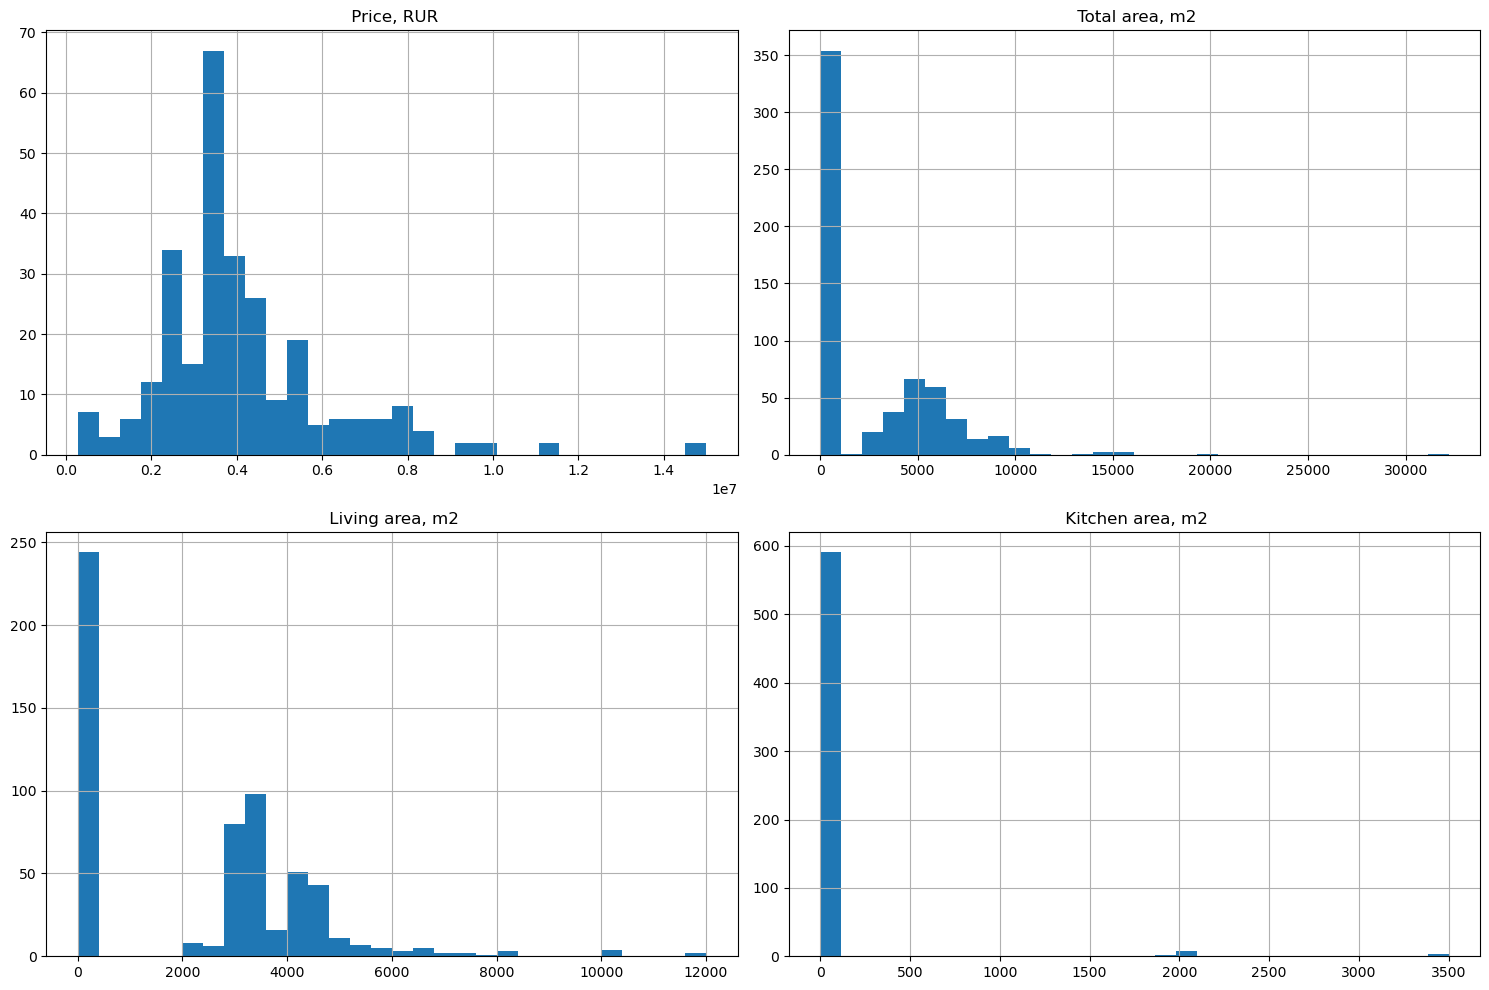

In [ ]:
df.duplicated().sum()
df = df.drop_duplicates() #getting the number of duplicated values and dropping them

df.info()
df.describe()

#Using Histograms to visualise and check for Outliers 
cols_to_fix = [' Price, RUR', ' Total area, m2', ' Living area, m2', ' Kitchen area, m2']
for col in cols_to_fix:
    df[col] = pd.to_numeric(df[col].str.replace(',', '').str.strip(), errors='coerce')

df.hist(figsize=(15,10), bins=30)
plt.tight_layout()
plt.show()


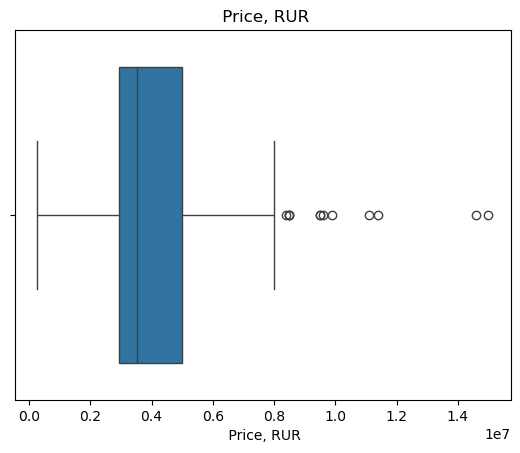

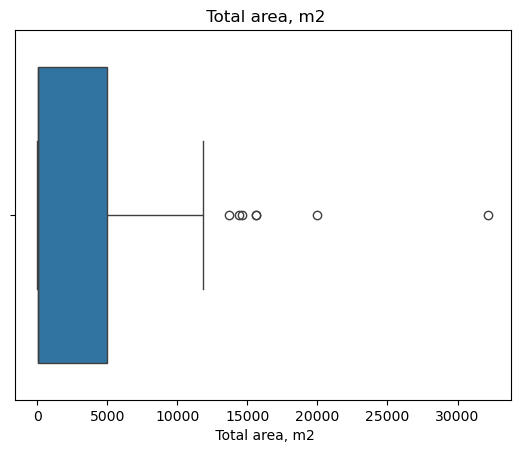

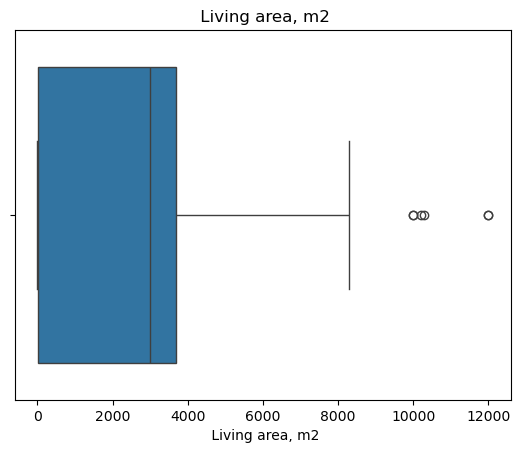

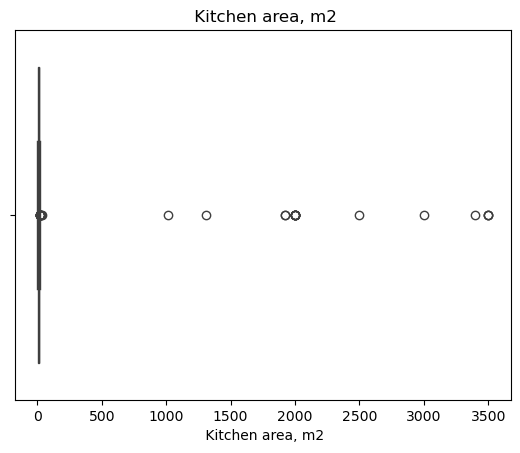

In [85]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

In [ ]:
#Checking the range distribution of data 
for col in [' Price, RUR', ' Total area, m2', ' Living area, m2', ' Kitchen area, m2']:
    print(col, "→", df[col].min(), "-", df[col].max())


 Price, RUR → 275000.0 - 6700000.0
 Total area, m2 → 19.0 - 76.7
 Living area, m2 → 0.0 - 52.4
 Kitchen area, m2 → 1.0 - 17.0


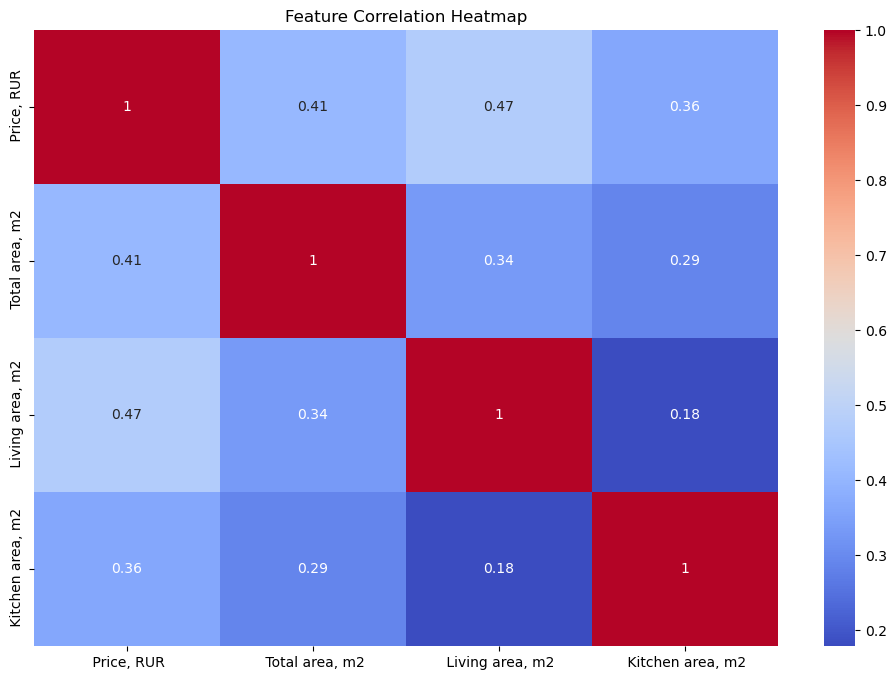

In [ ]:
# Plotting a heatmap featuring Correlation between the numeric values 
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()



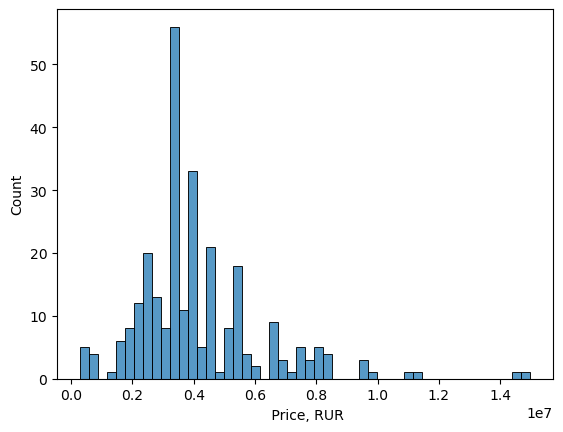

In [91]:
df[' Price, RUR'].describe()
sns.histplot(df[' Price, RUR'], bins=50)
plt.show()



In [ ]:
df.to_csv('processed_real_estate_data.csv',index=False) # Saving the final dataset 